In [7]:
#Data preparation 
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from __future__ import division
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#transpose and convert first column as header, generate the feature tables
geneaggregate = pd.read_csv('RC_data.csv')
df = geneaggregate[sorted(geneaggregate.columns)]
dfT = df.swapaxes("index", "columns")
new_header = dfT.iloc[0] #grab the first row for the header
featuretable = dfT[1:] #take the data less the header row
featuretable.columns = new_header #set the header row as the df header

#store the protein expression values and protein gene names 
samples = featuretable.values
sample_names = featuretable.columns

print(featuretable)

Unnamed: 0              Q9UBE0  Q9BSJ8  P02656 O95741  P09651  P55809  Q15631  \
cancer_cc_patient1_rep1  40914   41185  274731   4969  103836  101089  102971   
cancer_cc_patient1_rep2  45120   42150  284693   5472  118185   97593  110008   
cancer_cc_patient2_rep1  44113  113386  141656   7872  162475  137794  112840   
cancer_cc_patient2_rep2  47835  139305  155864   7957  170174   99304  129621   
cancer_cc_patient3_rep1  26957   35891  161075   6111  101960   88960   92826   
cancer_cc_patient3_rep2  26005   30788  124223   3722   82866   68415   75856   
cancer_cc_patient6_rep1  35712   52750  194500   4094  118675  117222  142954   
cancer_cc_patient6_rep2  30517   33753  166061   3580   83659   85197   92312   
cancer_cc_patient7_rep1  38094   62466  177344   5878   95034   96055   97456   
cancer_cc_patient7_rep2  26654   45894  133566   4066   71776   54583   58171   
cancer_cc_patient8_rep1  48576  113950  121262   5700  175963  122041  114483   
cancer_cc_patient8_rep2  290

## Global Batch Correction

In [10]:
from combat.pycombat import pycombat
#transform data into suitable format for batch correction 
df2 = df.set_index("Unnamed: 0")
df2_logtransformed = np.log2(df2)
#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
df_batchcorrected = pycombat(df2_logtransformed,batch)
df_batchcorrected
df_batchcorrected_T = df_batchcorrected.T
df_batchcorrected_T

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


Unnamed: 0,Q9UBE0,Q9BSJ8,P02656,O95741,P09651,P55809,Q15631,Q96EY1,Q16706,Q9UID3,...,P50395,P21283,Q08257,P51161,Q9H2A2,P13010,O95182,P62241,Q14573,Q99436
cancer_cc_patient1_rep1,15.261891,15.120885,18.038296,12.017492,16.528783,16.445190,16.561621,16.411772,15.799947,9.758744,...,18.405452,16.562000,18.628720,17.308034,15.123830,17.612549,15.719732,16.007835,14.220463,15.628695
cancer_cc_patient1_rep2,15.497953,15.529820,18.150705,12.618507,16.929017,16.714625,16.801537,16.583596,16.366595,10.463202,...,18.688335,17.017259,19.083291,17.324651,15.663390,17.838132,16.379401,16.546066,13.282330,15.843931
cancer_cc_patient2_rep1,15.385620,16.770919,16.933262,12.765636,17.294768,16.959425,16.728772,16.168529,16.424491,11.670427,...,19.347907,15.743608,19.206320,15.860449,15.143689,18.505624,16.491129,17.533600,13.558670,16.465482
cancer_cc_patient2_rep2,15.573816,17.083958,17.372370,13.105386,17.396542,16.737107,17.008293,16.410451,16.822171,12.025418,...,19.264426,16.211847,19.607998,16.103718,15.678620,18.689095,16.846228,17.553174,13.766450,16.652416
cancer_cc_patient3_rep1,14.576160,14.896713,17.147580,12.353880,16.497590,16.233003,16.372194,15.588221,16.772132,10.355943,...,19.098558,16.310533,19.978231,15.326957,14.766795,17.997399,15.965843,16.121521,12.584503,16.010178
cancer_cc_patient3_rep2,14.782542,15.121457,17.079209,12.117356,16.473731,16.255145,16.333088,15.649463,16.350529,10.926825,...,18.794364,17.100450,19.822723,15.257468,14.907591,17.995047,16.007752,15.986019,12.556466,15.711479
cancer_cc_patient6_rep1,15.038394,15.524121,17.462149,11.702529,16.757317,16.691000,17.160792,15.765475,16.444417,11.052388,...,18.974288,16.318496,20.254488,15.489748,14.868436,18.311539,15.841342,16.530455,12.874999,16.300697
cancer_cc_patient6_rep2,14.990264,15.240991,17.454246,12.066772,16.485945,16.538912,16.580518,15.815436,16.095301,11.262754,...,18.701159,16.415987,20.113555,15.521877,15.007682,18.094609,16.080465,16.446143,12.854917,16.049570
cancer_cc_patient7_rep1,15.144517,15.799568,17.308101,12.290668,16.377236,16.360390,16.461089,15.487084,16.477755,11.028674,...,18.623409,15.757512,19.792686,15.604300,14.790046,18.057919,16.358697,16.150432,13.066281,16.324340
cancer_cc_patient7_rep2,14.814546,15.640455,17.172902,12.232309,16.289483,15.962975,15.998559,15.650491,16.217439,11.487273,...,18.617412,15.917061,19.708468,15.590775,14.971815,17.907636,15.908900,16.171063,12.728632,16.019315


## Class Specific Batch Correction

In [13]:
#this block aims to separate the data by cases, in order to hide the class effects before performing quantile normalisation 
df_cancer = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
df_control = df.iloc[:, [13,14,15,16,17,18,19,20,21,22,23,24]]

#perform class specific batch correction 
from combat.pycombat import pycombat

#transform data into suitable format for batch correction and log transform
df_cancer = df_cancer.set_index("Unnamed: 0")
df_cancer_lc = np.log2(df_cancer)
#df_control = df_control.set_index("Unnamed: 0")
df_control_lc = np.log2(df_control) 

#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2]
df_cancer_bc = pycombat(df_cancer_lc,batch)
df_control_bc = pycombat(df_control_lc,batch)
df_control_bc = df_control_bc.set_index(df_cancer_bc.index)

#merge the two class specific batch correction 
df_merge = pd.concat([df_cancer_bc, df_control_bc], axis = 1)
df_merge

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


,cancer_cc_patient1_rep1,cancer_cc_patient1_rep2,cancer_cc_patient2_rep1,cancer_cc_patient2_rep2,cancer_cc_patient3_rep1,cancer_cc_patient3_rep2,cancer_cc_patient6_rep1,cancer_cc_patient6_rep2,cancer_cc_patient7_rep1,cancer_cc_patient7_rep2,...,normal_cc_patient2_rep1,normal_cc_patient2_rep2,normal_cc_patient3_rep1,normal_cc_patient3_rep2,normal_cc_patient6_rep1,normal_cc_patient6_rep2,normal_cc_patient7_rep1,normal_cc_patient7_rep2,normal_cc_patient8_rep1,normal_cc_patient8_rep2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Q9UBE0,15.220229,15.530531,15.344171,15.606667,14.533316,14.812533,14.996347,15.021006,15.102653,14.844652,...,15.098870,14.969096,14.631736,14.839756,14.393027,14.324361,14.671554,14.400496,14.701684,14.488799
Q9BSJ8,15.024828,15.616666,16.653280,17.182701,14.803588,15.205177,15.422789,15.325625,15.694634,15.728148,...,16.092446,16.095886,15.448867,15.861459,15.516566,15.359067,15.819404,15.531918,15.195841,15.395601
P02656,18.014359,18.173844,16.913678,17.392095,17.127152,17.097648,17.440481,17.474330,17.287040,17.191751,...,16.502273,17.200232,18.067615,18.102970,17.354912,17.223812,16.991015,17.000951,17.391903,17.328958
O95741,12.124992,12.523417,12.891642,13.009279,12.469701,12.023312,11.802239,11.972835,12.404926,12.138025,...,12.180221,13.048371,13.703657,14.031494,12.591010,12.733631,13.553933,13.357162,12.284492,12.674422
P09651,16.495669,16.968211,17.224395,17.445073,16.465993,16.503832,16.713086,16.516290,16.351493,16.315904,...,16.762736,16.784511,16.547937,16.808026,16.449097,16.251615,16.691451,16.154912,15.987320,16.068521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P13010,17.586637,17.868780,18.457040,18.731905,17.961717,18.027938,18.267882,18.128923,18.020700,17.939277,...,17.786272,17.963750,17.614359,17.947681,17.783909,17.501103,18.168248,17.767633,18.129695,17.772167
O95182,15.856153,16.276552,16.609029,16.747339,16.096355,15.901750,15.974842,15.975079,16.479777,15.802059,...,17.509027,17.623749,17.580391,17.786374,17.251668,17.175588,17.255710,17.115774,17.755857,17.353628
P62241,15.931227,16.624132,17.433840,17.640753,16.043187,16.058796,16.445916,16.523266,16.071660,16.245587,...,16.679040,16.714256,15.812591,16.127525,16.325025,15.905104,16.453108,16.063876,15.741372,15.720909


## Compare mean of global versus class specific batch correction

#### Global (Class)

In [73]:
#Before global batch correction
beforeglobal_class_means = df2_logtransformed.iloc[:,0:12].mean()

In [74]:
#After global batch correction 
afterglobal_class_means = df_batchcorrected.iloc[:,0:12].mean()

In [75]:
beforeglobal_class_means - afterglobal_class_means

cancer_cc_patient1_rep1    0.152284
cancer_cc_patient1_rep2   -0.116070
cancer_cc_patient2_rep1    0.105401
cancer_cc_patient2_rep2   -0.080523
cancer_cc_patient3_rep1    0.154113
cancer_cc_patient3_rep2   -0.164191
cancer_cc_patient6_rep1    0.145203
cancer_cc_patient6_rep2   -0.159229
cancer_cc_patient7_rep1    0.147856
cancer_cc_patient7_rep2   -0.168957
cancer_cc_patient8_rep1    0.114690
cancer_cc_patient8_rep2   -0.148774
dtype: float64

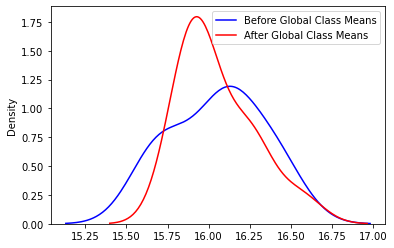

In [88]:
import seaborn as sns
sns.kdeplot(data = beforeglobal_class_means, color = "b", label = "Before Global Class Means")
sns.kdeplot(data = afterglobal_class_means, color = "r", label = "After Global Class Means")
plt.legend()

#### Global (ControL)

In [90]:
## Before Global Batch Correction
before_global_control_means = df2_logtransformed.iloc[:,12:24].mean()

In [91]:
## After Global Batch Correction
after_global_control_means = df_batchcorrected.iloc[:,12:24].mean()

In [92]:
before_global_control_means - after_global_control_means

normal_cc_patient1_rep1    0.142929
normal_cc_patient1_rep2   -0.104659
normal_cc_patient2_rep1    0.133144
normal_cc_patient2_rep2   -0.100825
normal_cc_patient3_rep1    0.145486
normal_cc_patient3_rep2   -0.103884
normal_cc_patient6_rep1    0.142132
normal_cc_patient6_rep2   -0.172148
normal_cc_patient7_rep1    0.138647
normal_cc_patient7_rep2   -0.172787
normal_cc_patient8_rep1    0.150026
normal_cc_patient8_rep2   -0.167935
dtype: float64

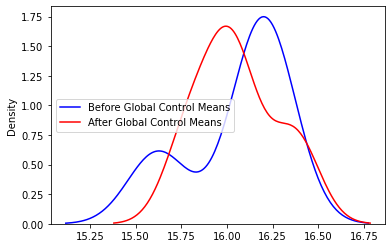

In [94]:
import seaborn as sns
sns.kdeplot(data = before_global_control_means, color = "b", label = "Before Global Control Means")
sns.kdeplot(data = after_global_control_means, color = "r", label = "After Global Control Means")
plt.legend()

### Class Specific Batch Correction (Class)

In [79]:
# Before Class Specific Batch Correction
before_cs_class_means = df_cancer_lc.mean()

In [80]:
# After Class Specific Batch Correction
after_cs_class_means = df_cancer_bc.mean()

In [81]:
before_cs_class_means - after_cs_class_means

cancer_cc_patient1_rep1    0.167384
cancer_cc_patient1_rep2   -0.131335
cancer_cc_patient2_rep1    0.124555
cancer_cc_patient2_rep2   -0.097883
cancer_cc_patient3_rep1    0.170623
cancer_cc_patient3_rep2   -0.177447
cancer_cc_patient6_rep1    0.165308
cancer_cc_patient6_rep2   -0.173263
cancer_cc_patient7_rep1    0.168088
cancer_cc_patient7_rep2   -0.182329
cancer_cc_patient8_rep1    0.137712
cancer_cc_patient8_rep2   -0.163366
dtype: float64

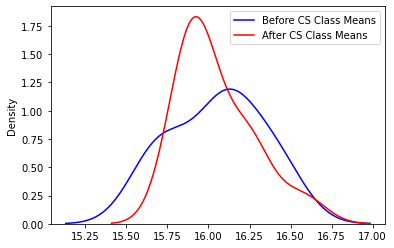

In [95]:
import seaborn as sns
sns.kdeplot(data = before_cs_class_means, color = "b", label = "Before CS Class Means")
sns.kdeplot(data = after_cs_class_means, color = "r", label = "After CS Class Means")
plt.legend()

### Class Specific Batch Correction (Control)

In [83]:
## Before Class Specific Batch Correction
before_cs_control_means = df_control_lc.mean()

In [84]:
## After Class Specific Batch Correction 
after_cs_control_means = df_control_bc.mean()

In [85]:
before_cs_control_means - after_cs_control_means 

normal_cc_patient1_rep1    0.122526
normal_cc_patient1_rep2   -0.058638
normal_cc_patient2_rep1    0.091556
normal_cc_patient2_rep2   -0.052078
normal_cc_patient3_rep1    0.131283
normal_cc_patient3_rep2   -0.057566
normal_cc_patient6_rep1    0.122853
normal_cc_patient6_rep2   -0.184734
normal_cc_patient7_rep1    0.108163
normal_cc_patient7_rep2   -0.185890
normal_cc_patient8_rep1    0.149528
normal_cc_patient8_rep2   -0.176750
dtype: float64

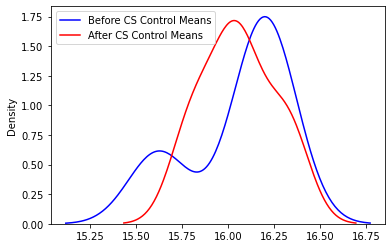

In [96]:
import seaborn as sns
sns.kdeplot(data = before_cs_control_means, color = "b", label = "Before CS Control Means")
sns.kdeplot(data = after_cs_control_means, color = "r", label = "After CS Control Means")
plt.legend()